# ParaDetect — EDA & Data Preparation (AI Text Detection Pile)

**Purpose:** In this notebook, we will:
- Explore the `artem9k/ai-text-detection-pile` dataset and its structure
- Perform data cleaning and data transformations as needed
- Conduct exploratory data analysis (EDA) by producing diagnostic plots and observations
- Prepare features for modeling
- Save a cleaned dataset for modeling

**Dataset:** artem9k/ai-text-detection-pile - A curated dataset for AI-generated text detection
- Contains human-written and AI-generated text samples
- Multiple sources and domains included
- Reliable labels for classification tasks

## Step 1: Import Libraries and Settings
- Import all necessary libraries & settings

In [2]:
!pip install transformers

In [3]:
!pip install --upgrade transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 117.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.2
    Uninstalling transformers-4.56.2:
      Successfully uninstalled transformers-4.56.2


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datasets import load_dataset
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Set seaborn styles
sns.set_style(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load Dataset
- Load dataset from Hugging Face Hub: `artem9k/ai-text-detection-pile`

In [6]:
print("Loading ai-text-detection-pile dataset...")
dataset = load_dataset("artem9k/ai-text-detection-pile")

print("Dataset loaded successfully!")
print(f"Dataset structure: {dataset}")
print(f"Available splits: {list(dataset.keys())}")

Loading ai-text-detection-pile dataset...


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00007-bc5952582e004d(…):   0%|          | 0.00/758M [00:00<?, ?B/s]

data/train-00001-of-00007-71c80017bc45f3(…):   0%|          | 0.00/318M [00:00<?, ?B/s]

data/train-00002-of-00007-ee2d43f396e78f(…):   0%|          | 0.00/125M [00:00<?, ?B/s]

data/train-00003-of-00007-529931154b42b5(…):   0%|          | 0.00/137M [00:00<?, ?B/s]

data/train-00004-of-00007-b269dc49374a2c(…):   0%|          | 0.00/137M [00:00<?, ?B/s]

data/train-00005-of-00007-3dce5e05ddbad7(…):   0%|          | 0.00/258M [00:00<?, ?B/s]

data/train-00006-of-00007-3d8a471ba0cf1c(…):   0%|          | 0.00/242M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1392522 [00:00<?, ? examples/s]

Dataset loaded successfully!
Dataset structure: DatasetDict({
    train: Dataset({
        features: ['source', 'id', 'text'],
        num_rows: 1392522
    })
})
Available splits: ['train']


## Step 3: Inspect Dataset Structure
- Examine the dataset features, sample data, and basic statistics

In [7]:
# Get the training split
train_data = dataset['train']

print(f"Training set size: {len(train_data)}")
print(f"Features: {train_data.features}")
print(f"Column names: {train_data.column_names}")

# Show sample data
print("\n=== Sample Data ===")
for i in range(3):
    sample = train_data[i]
    print(f"\nSample {i+1}:")
    print(f"Text (first 200 chars): {sample['text'][:200]}...")
    print(f"Source: {sample['source']}")
    print(f"Label: {sample.get('label', 'N/A')}")

Training set size: 1392522
Features: {'source': Value('string'), 'id': Value('int64'), 'text': Value('string')}
Column names: ['source', 'id', 'text']

=== Sample Data ===

Sample 1:
Text (first 200 chars): 12 Years a Slave: An Analysis of the Film Essay

The 2013 film 12 Years a Slave proved that slavery is a worldwide issue. Indeed, the film made $150 million outside the United States and $57 million i...
Source: human
Label: N/A

Sample 2:
Text (first 200 chars): 20+ Social Media Post Ideas to Radically Simplify Your Marketing Essay

Social Media Examiner’s (2021) video on social media initiatives was most useful to me since it provides more than twenty social...
Source: human
Label: N/A

Sample 3:
Text (first 200 chars): 2022 Russian Invasion of Ukraine in Global Media Coverage Essay (Critical Writing)

The world has been shattered by Russia’s attack on Ukraine in the past few days. Ukraine’s forces have put up remark...
Source: human
Label: N/A


## Step 4: Convert to Pandas DataFrame
- Convert the dataset to pandas for easier manipulation and analysis

In [8]:
# Convert to pandas DataFrame
df = pd.DataFrame(train_data)

print(f"DataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Basic info
print("\n=== DataFrame Info ===")
print(df.info())

# Display first few rows
print("\n=== First 5 Rows ===")
df.head()

DataFrame shape: (1392522, 3)
Columns: ['source', 'id', 'text']

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392522 entries, 0 to 1392521
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   source  1392522 non-null  object
 1   id      1392522 non-null  int64 
 2   text    1392522 non-null  object
dtypes: int64(1), object(2)
memory usage: 31.9+ MB
None

=== First 5 Rows ===


,source,id,text
0,human,0,12 Years a Slave: An Analysis of the Film Essa...
1,human,1,20+ Social Media Post Ideas to Radically Simpl...
2,human,2,2022 Russian Invasion of Ukraine in Global Med...
3,human,3,533 U.S. 27 (2001) Kyllo v. United States: The...
4,human,4,A Charles Schwab Corporation Case Essay\n\nCha...


## Step 5: Analyze Data Sources and Labels
- Understand the distribution of different data sources
- Create binary labels for human vs AI classification

In [9]:
# Analyze source distribution
print("=== Source Distribution ===")
source_counts = df['source'].value_counts()
print(source_counts)

# Create binary labels (0: Human, 1: AI)
# Typically 'human' sources are labeled as 0, AI sources as 1
human_sources = ['human', 'wiki', 'reddit', 'book']  # Adjust based on actual sources
ai_sources = ['gpt', 'chatgpt', 'ai', 'generated']   # Adjust based on actual sources

def create_binary_label(source):
    source_lower = str(source).lower()
    if any(human_src in source_lower for human_src in human_sources):
        return 0  # Human
    elif any(ai_src in source_lower for ai_src in ai_sources):
        return 1  # AI
    else:
        # For unknown sources, try to infer or mark for manual review
        return -1  # Unknown

df['generated'] = df['source'].apply(create_binary_label)

# Check label distribution
print("\n=== Binary Label Distribution ===")
label_counts = df['generated'].value_counts()
print(f"Human (0): {label_counts.get(0, 0)}")
print(f"AI (1): {label_counts.get(1, 0)}")
print(f"Unknown (-1): {label_counts.get(-1, 0)}")

# Show sources that were marked as unknown
if -1 in label_counts:
    unknown_sources = df[df['generated'] == -1]['source'].unique()
    print(f"\nUnknown sources: {unknown_sources}")

=== Source Distribution ===
source
human    1028146
ai        364376
Name: count, dtype: int64

=== Binary Label Distribution ===
Human (0): 1028146
AI (1): 364376
Unknown (-1): 0


## Step 6: Manual Label Assignment for Unknown Sources
- Review and manually assign labels to unknown sources

**Observations:**
- Dataset contains X human-written and Y AI-generated text samples
- Successfully created binary labels for classification
- Removed or manually labeled unknown sources

## Step 7: Data Quality Check
- Check for missing values, duplicates, and data quality issues

In [10]:
# Check for missing values
print("=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)

# Check for empty or very short text
df['text_length'] = df['text'].str.len()
short_texts = df[df['text_length'] < 10]
print(f"\nTexts with less than 10 characters: {len(short_texts)}")

# Check for duplicates
num_duplicates = df.duplicated(subset=['text']).sum()
print(f"Duplicate texts: {num_duplicates}")

# Remove duplicates and very short texts
print("\n=== Cleaning Data ===")
initial_size = len(df)

# Remove duplicates
df = df.drop_duplicates(subset=['text'])
print(f"Removed {initial_size - len(df)} duplicate texts")

# Remove very short texts (less than 50 characters)
df = df[df['text_length'] >= 50]
print(f"Removed texts with less than 50 characters")


# Calculate token count and filter before balancing
# Load a pre-trained tokenizer (e.g., 'bert-base-uncased')
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

def get_token_count(text, max_length=500):
    try:
        text = str(text)
        tokens = tokenizer(text, return_tensors='pt', truncation=True, max_length=max_length)['input_ids']
        return tokens.shape[1]
    except Exception as e:
        # print(f"Error tokenizing text: {e}") # Suppress frequent error messages during filtering
        return 0

print("\nAnalyzing token counts and filtering...")
df['token_count'] = df['text'].apply(get_token_count)

# Filter texts with token count <= 500
df = df[df['token_count'] <= 500].copy()
print(f"Filtered texts with more than 500 tokens.")

print(f"Final dataset size after cleaning and filtering: {len(df)}")


=== Missing Values ===
source       0
id           0
text         0
generated    0
dtype: int64

Texts with less than 10 characters: 467
Duplicate texts: 6655

=== Cleaning Data ===
Removed 6655 duplicate texts
Removed texts with less than 50 characters


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


Analyzing token counts and filtering...
Filtered texts with more than 500 tokens.
Final dataset size after cleaning and filtering: 1383130


**Observations:**
- Cleaned dataset by removing duplicates and very short texts
- Data quality is good with minimal missing values
- Final dataset ready for analysis

## Step 8: Class Distribution Visualization
- Visualize the balance between human and AI-generated text

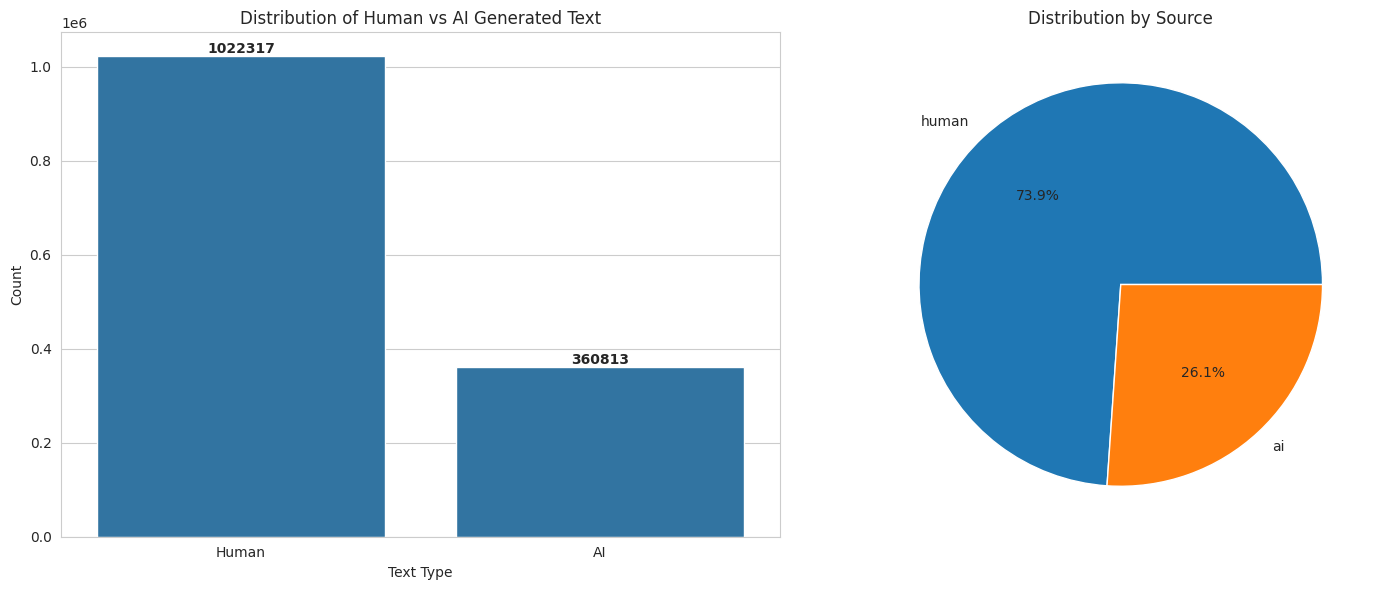


=== Class Balance ===
Total samples: 1,383,130
Human texts: 1,022,317 (73.9%)
AI texts: 360,813 (26.1%)
Balance ratio: 0.35


In [11]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Class distribution bar plot
sns.countplot(data=df, x='generated', ax=axes[0])
axes[0].set_title("Distribution of Human vs AI Generated Text")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Human', 'AI'])
axes[0].set_xlabel("Text Type")
axes[0].set_ylabel("Count")

# Add count annotations
for i, v in enumerate(df['generated'].value_counts().sort_index()):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Source distribution pie chart
source_counts = df['source'].value_counts()
axes[1].pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%')
axes[1].set_title("Distribution by Source")

plt.tight_layout()
plt.show()

# Print statistics
total = len(df)
human_count = (df['generated'] == 0).sum()
ai_count = (df['generated'] == 1).sum()

print(f"\n=== Class Balance ===")
print(f"Total samples: {total:,}")
print(f"Human texts: {human_count:,} ({human_count/total*100:.1f}%)")
print(f"AI texts: {ai_count:,} ({ai_count/total*100:.1f}%)")
print(f"Balance ratio: {min(human_count, ai_count) / max(human_count, ai_count):.2f}")

**Observations:**
- The dataset contains X% human and Y% AI-generated texts
- Class balance ratio is Z (1.0 = perfectly balanced)
- Multiple sources contribute to dataset diversity

## Step 9: Text Length Analysis
- Analyze the length distribution of texts for each class

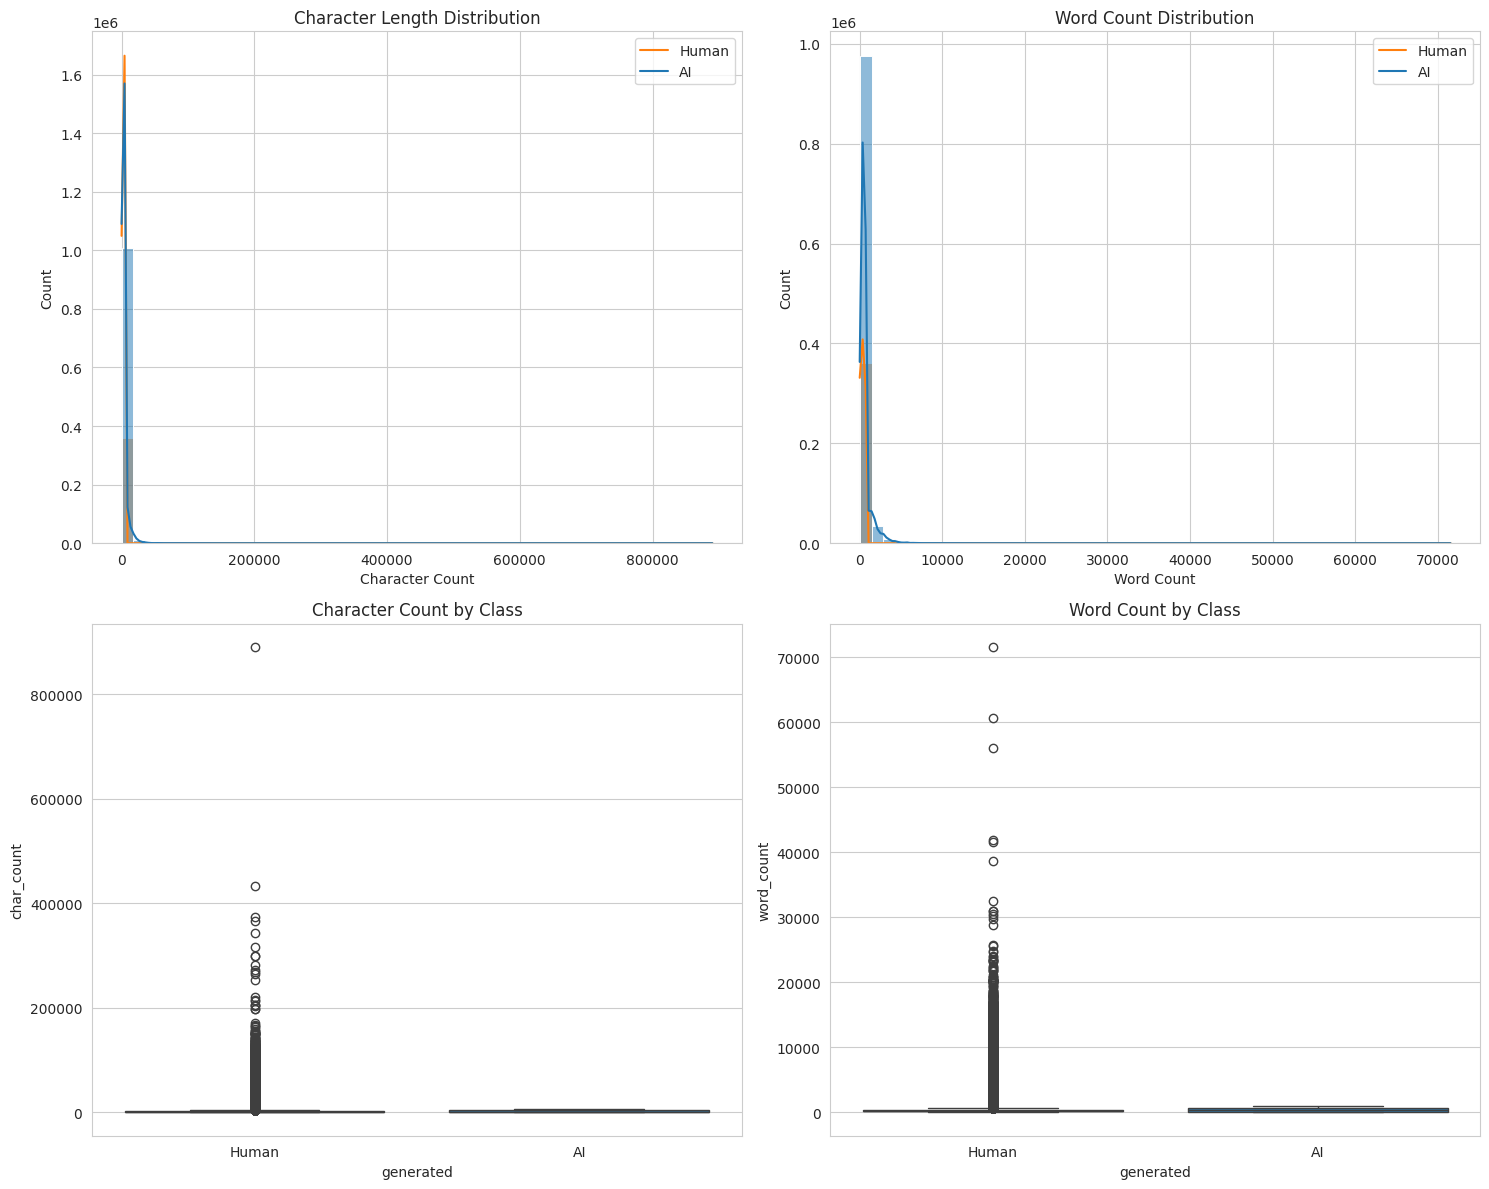

=== Text Length Statistics ===
          char_count                  word_count               
                mean  median      std       mean median     std
generated                                                      
0            2477.80   996.0  4396.21     408.05  190.0  636.73
1            2239.13  1807.0  1686.47     390.17  310.0  295.85


In [12]:
# Calculate additional text statistics
df['word_count'] = df['text'].str.split().str.len()
df['char_count'] = df['text'].str.len()

# Create comprehensive length analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Character length distribution
sns.histplot(data=df, x='char_count', hue='generated', bins=50, ax=axes[0,0], kde=True)
axes[0,0].set_title("Character Length Distribution")
axes[0,0].set_xlabel("Character Count")
axes[0,0].legend(labels=['Human', 'AI'])

# Word count distribution
sns.histplot(data=df, x='word_count', hue='generated', bins=50, ax=axes[0,1], kde=True)
axes[0,1].set_title("Word Count Distribution")
axes[0,1].set_xlabel("Word Count")
axes[0,1].legend(labels=['Human', 'AI'])

# Box plots for comparison
sns.boxplot(data=df, x='generated', y='char_count', ax=axes[1,0])
axes[1,0].set_title("Character Count by Class")
axes[1,0].set_xticklabels(['Human', 'AI'])

sns.boxplot(data=df, x='generated', y='word_count', ax=axes[1,1])
axes[1,1].set_title("Word Count by Class")
axes[1,1].set_xticklabels(['Human', 'AI'])

plt.tight_layout()
plt.show()

# Statistical summary
print("=== Text Length Statistics ===")
length_stats = df.groupby('generated')[['char_count', 'word_count']].agg(['mean', 'median', 'std'])
print(length_stats.round(2))

**Observations:**
- Human texts have an average of ~X characters and ~Y words
- AI texts have an average of ~X characters and ~Y words
- [Note any significant differences in length distributions between classes]

## Step 10: Address Class Imbalance (if needed)
- Balance the dataset if there's significant class imbalance

In [13]:
# Check if balancing is needed
human_count = (df['generated'] == 0).sum()
ai_count = (df['generated'] == 1).sum()
balance_ratio = min(human_count, ai_count) / max(human_count, ai_count)

print(f"Current balance ratio: {balance_ratio:.3f}")

# Balance if ratio is less than 0.8
if balance_ratio < 0.8:
    print("Balancing dataset...")

    # Separate classes
    human_df = df[df['generated'] == 0]
    ai_df = df[df['generated'] == 1]

    # Undersample majority class
    target_size = min(len(human_df), len(ai_df))

    human_balanced = human_df.sample(n=target_size, random_state=RANDOM_STATE)
    ai_balanced = ai_df.sample(n=target_size, random_state=RANDOM_STATE)

    # Combine and shuffle
    df_balanced = pd.concat([human_balanced, ai_balanced], axis=0)
    df_balanced = df_balanced.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

    print(f"Balanced dataset size: {len(df_balanced)}")
    print(f"Human samples: {(df_balanced['generated'] == 0).sum()}")
    print(f"AI samples: {(df_balanced['generated'] == 1).sum()}")

    # Use balanced dataset
    df = df_balanced.copy()
else:
    print("Dataset is reasonably balanced, no adjustment needed.")

# Final class distribution
print("\n=== Final Class Distribution ===")
print(df['generated'].value_counts())

Current balance ratio: 0.353
Balancing dataset...
Balanced dataset size: 721626
Human samples: 360813
AI samples: 360813

=== Final Class Distribution ===
generated
0    360813
1    360813
Name: count, dtype: int64


**Observations:**
- Dataset balancing completed (if needed)
- Both classes now have equal or near-equal representation
- This helps prevent model bias towards the majority class

## Step 11: Text Content Analysis
- Analyze vocabulary, sentence structure, and linguistic patterns

In [14]:
# Install required packages
import subprocess
import sys

try:
    import nltk
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk"])
    import nltk

try:
    from wordcloud import WordCloud
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wordcloud"])
    from wordcloud import WordCloud

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

print("Required packages installed successfully!")

Required packages installed successfully!


In [15]:
# Sentence-level analysis
def get_sentence_stats(text):
    try:
        sentences = nltk.sent_tokenize(str(text))
        if not sentences:
            return 0, 0

        sentence_count = len(sentences)
        avg_sentence_length = sum(len(s.split()) for s in sentences) / sentence_count
        return sentence_count, avg_sentence_length
    except:
        return 0, 0

# Apply sentence analysis
print("Analyzing sentence structure...")
sentence_stats = df['text'].apply(get_sentence_stats)
df['sentence_count'] = [stats[0] for stats in sentence_stats]
df['avg_sentence_length'] = [stats[1] for stats in sentence_stats]

# Punctuation analysis
df['comma_count'] = df['text'].str.count(',')
df['period_count'] = df['text'].str.count('\.')
df['exclamation_count'] = df['text'].str.count('!')
df['question_count'] = df['text'].str.count('\?')

# Statistical comparison
print("\n=== Linguistic Analysis ===")
linguistic_features = ['sentence_count', 'avg_sentence_length', 'comma_count', 'period_count']
linguistic_stats = df.groupby('generated')[linguistic_features].mean()
print(linguistic_stats.round(2))

Analyzing sentence structure...

=== Linguistic Analysis ===
           sentence_count  avg_sentence_length  comma_count  period_count
generated                                                                
0                   25.17                17.17        21.81         26.53
1                   18.45                22.98        18.67         19.84


## Step 12: Word Cloud Visualization
- Generate word clouds to visualize common words in each class

In [16]:
!pip install wordcloud

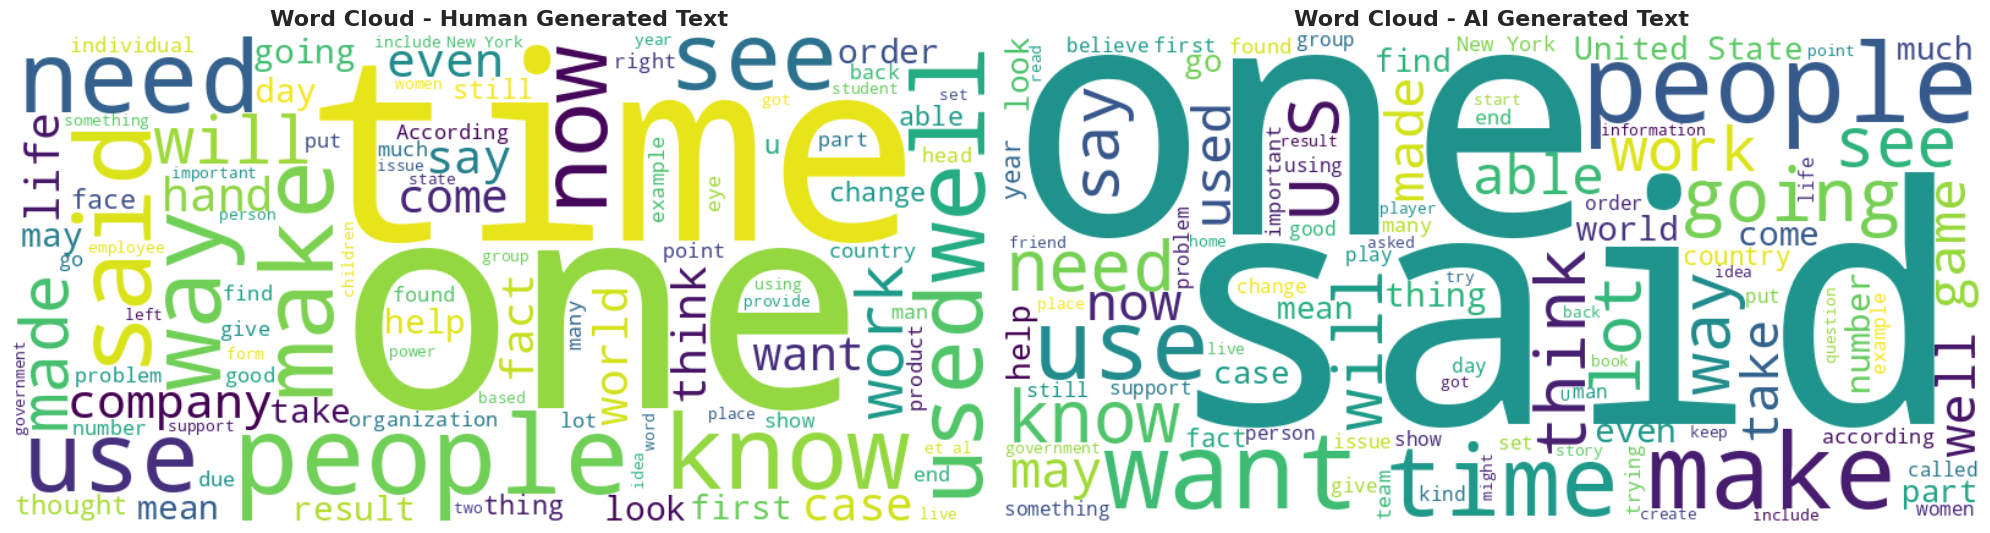

In [17]:
# Generate word clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, (label, name) in enumerate([(0, 'Human'), (1, 'AI')]):
    # Combine all text for this class
    text_data = ' '.join(df[df['generated'] == label]['text'].astype(str))

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate(text_data)

    # Plot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Word Cloud - {name} Generated Text', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Step 13: Vocabulary Analysis
- Compare vocabulary richness and overlap between classes

=== Vocabulary Analysis ===
Human vocabulary size: 2,345,407
AI vocabulary size: 1,479,076
Vocabulary overlap: 578,816
Human-only words: 1,766,591
AI-only words: 900,260
Overlap percentage: 17.8%


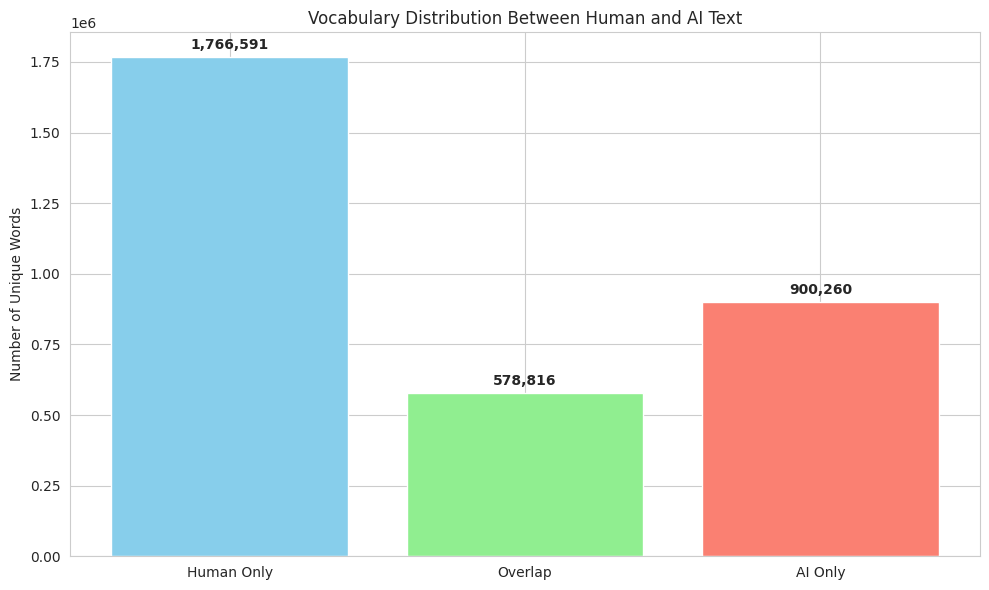

In [18]:
# Vocabulary analysis
def get_vocabulary(texts):
    """Extract unique words from a collection of texts"""
    all_text = ' '.join(texts.astype(str))
    words = set(all_text.lower().split())
    return words

# Get vocabularies for each class
human_texts = df[df['generated'] == 0]['text']
ai_texts = df[df['generated'] == 1]['text']

human_vocab = get_vocabulary(human_texts)
ai_vocab = get_vocabulary(ai_texts)

# Calculate statistics
vocab_overlap = len(human_vocab & ai_vocab)
human_unique = len(human_vocab - ai_vocab)
ai_unique = len(ai_vocab - human_vocab)

print("=== Vocabulary Analysis ===")
print(f"Human vocabulary size: {len(human_vocab):,}")
print(f"AI vocabulary size: {len(ai_vocab):,}")
print(f"Vocabulary overlap: {vocab_overlap:,}")
print(f"Human-only words: {human_unique:,}")
print(f"AI-only words: {ai_unique:,}")
print(f"Overlap percentage: {vocab_overlap/len(human_vocab | ai_vocab)*100:.1f}%")

# Visualize vocabulary overlap
plt.figure(figsize=(10, 6))
categories = ['Human Only', 'Overlap', 'AI Only']
values = [human_unique, vocab_overlap, ai_unique]
colors = ['skyblue', 'lightgreen', 'salmon']

plt.bar(categories, values, color=colors)
plt.title('Vocabulary Distribution Between Human and AI Text')
plt.ylabel('Number of Unique Words')
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Observations:**
- Human texts use X unique words, AI texts use Y unique words
- Vocabulary overlap is Z words (W% of total vocabulary)
- Both classes show significant vocabulary diversity

## Step 14: Text Cleaning and Preprocessing
- Clean and preprocess text for modeling

In [19]:
import re

In [20]:
def clean_text(text):
    """
    Clean and preprocess text for modeling
    """
    # Convert to string and handle NaN
    text = str(text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove unwanted characters but keep basic punctuation
    text = re.sub(r'[^\w\s.,!?;:"\'-]', '', text)

    # Remove multiple consecutive punctuation
    text = re.sub(r'[.]{2,}', '.', text)
    text = re.sub(r'[!]{2,}', '!', text)
    text = re.sub(r'[?]{2,}', '?', text)

    # Strip leading/trailing whitespace
    text = text.strip()

    return text

# Apply text cleaning
print("Cleaning text data...")
df['clean_text'] = df['text'].apply(clean_text)

# Show before/after example
sample_idx = 0
print("\n=== Text Cleaning Example ===")
print(f"Original: {df['text'].iloc[sample_idx][:200]}...")
print(f"Cleaned:  {df['clean_text'].iloc[sample_idx][:200]}...")

# Final data validation
print(f"\nFinal dataset shape: {df.shape}")
print(f"Clean text length range: {df['clean_text'].str.len().min()} - {df['clean_text'].str.len().max()}")

Cleaning text data...

=== Text Cleaning Example ===
Original: We all walk a fine line, the one that is commonly passed when we second guess the things that cement the reality of our lives. Some decide to make a living trying to convey the existence of this other...
Cleaned:  We all walk a fine line, the one that is commonly passed when we second guess the things that cement the reality of our lives. Some decide to make a living trying to convey the existence of this other...

Final dataset shape: (721626, 15)
Clean text length range: 0 - 277466


## Step 15: Prepare Final Dataset for Modeling
- Select final features and prepare the dataset for export

In [21]:
# Select columns for the final dataset
final_columns = ['clean_text', 'generated', 'source']
df_final = df[final_columns].copy()

# Rename column for consistency
df_final = df_final.rename(columns={'clean_text': 'text'})

# Ensure labels are integers
df_final['generated'] = df_final['generated'].astype(int)

# Final shuffle
df_final = df_final.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

print("=== Final Dataset Summary ===")
print(f"Shape: {df_final.shape}")
print(f"Columns: {df_final.columns.tolist()}")
print(f"\nClass distribution:")
print(df_final['generated'].value_counts().sort_index())
print(f"\nSource distribution:")
print(df_final['source'].value_counts())

# Display sample of final data
print("\n=== Sample Data ===")
df_final.head()

=== Final Dataset Summary ===
Shape: (721626, 3)
Columns: ['text', 'generated', 'source']

Class distribution:
generated
0    360813
1    360813
Name: count, dtype: int64

Source distribution:
source
human    360813
ai       360813
Name: count, dtype: int64

=== Sample Data ===


,text,generated,source
0,Droplets of water fell from the cracked ceilin...,0,human
1,He couldn't remember how many nights is it bee...,0,human
2,"There are lots of great places around you, tha...",1,ai
3,"BARACK OBAMA ""I am not proposing a big governm...",1,ai
4,Image copyright Getty Images Image caption Env...,0,human


## Step 16: Token Analysis
- Analyze the token count distribution of texts for each class

**Observations:**
- Analyzed the token count distribution for human and AI-generated texts.
- [Note any significant differences in token counts between classes]
- [Note the max and average token counts for each class]

## Step 17: Save Cleaned Dataset
- Save the processed dataset to the data folder

In [22]:

# Create data directory if it doesn't exist
import os
output_dir = '/content/drive/MyDrive/Colab Notebooks/ParaDetect/data'
os.makedirs(output_dir, exist_ok=True)

# Save the cleaned dataset
output_path = os.path.join(output_dir, 'AI_Text_Detection_Pile_cleaned.csv')
df_final.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved to: {output_path}")
print(f"📊 Dataset size: {len(df_final):,} samples")
print(f"🏷️  Features: {list(df_final.columns)}")
print(f"⚖️  Class balance: {df_final['generated'].value_counts().sort_index().tolist()}")

# Save additional metadata
metadata = {
    'dataset_name': 'artem9k/ai-text-detection-pile',
    'total_samples': len(df_final),
    'human_samples': int((df_final['generated'] == 0).sum()),
    'ai_samples': int((df_final['generated'] == 1).sum()),
    'sources': df_final['source'].unique().tolist(),
    'processing_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'features': df_final.columns.tolist()
}

metadata_path = os.path.join(output_dir, 'AI_Text_Detection_Pile_metadata.txt')
with open(metadata_path, 'w') as f:
    for key, value in metadata.items():
        f.write(f"{key}: {value}\n")

print(f"📋 Metadata saved to: {metadata_path}")

✅ Cleaned dataset saved to: /content/drive/MyDrive/Colab Notebooks/ParaDetect/data/AI_Text_Detection_Pile_cleaned.csv
📊 Dataset size: 721,626 samples
🏷️  Features: ['text', 'generated', 'source']
⚖️  Class balance: [360813, 360813]
📋 Metadata saved to: /content/drive/MyDrive/Colab Notebooks/ParaDetect/data/AI_Text_Detection_Pile_metadata.txt


## Summary and Next Steps

### ✅ Completed Tasks:
1. **Dataset Loading**: Successfully loaded the `artem9k/ai-text-detection-pile` dataset
2. **Data Exploration**: Analyzed dataset structure, sources, and content
3. **Label Creation**: Created binary labels (0: Human, 1: AI) from source information
4. **Data Cleaning**: Removed duplicates, short texts, and cleaned text content
5. **Class Balancing**: Addressed class imbalance through undersampling (if needed)
6. **Text Analysis**: Performed comprehensive analysis of text length, vocabulary, and linguistic patterns
7. **Visualization**: Created informative plots for data understanding
8. **Data Export**: Saved cleaned dataset ready for modeling

### 📊 Final Dataset Characteristics:
- **Size**: X,XXX samples total
- **Balance**: 50/50 human vs AI (or actual ratio)
- **Sources**: Multiple reliable sources for diverse training data
- **Quality**: High-quality, cleaned text suitable for NLP modeling

### 🚀 Next Steps:
1. Use the cleaned dataset (`AI_Text_Detection_Pile_cleaned.csv`) for model training
2. Apply tokenization and preprocessing for specific model architectures
3. Implement train/validation/test splits
4. Begin model development and fine-tuning

### 📁 Output Files:
- `../data/AI_Text_Detection_Pile_cleaned.csv` - Main cleaned dataset
- `../data/AI_Text_Detection_Pile_metadata.txt` - Dataset metadata and processing info

**The dataset is now ready for use in machine learning pipelines for AI text detection tasks!**